# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [96]:
# Your code here
def monty_hall(n):
    
    '''
    simulates the monty hall problem 
    returns x array of number of simulations and
    a y array for probability of success
    '''
    
    import numpy as np
    changed_list = []
    didnt_change_list = []
    for x in range(1,n):
        doors = np.array([1,2,3])
        car_door = np.random.randint(1,4) 
        first_guess = np.random.randint(1,4)
        rest_of_doors = doors[doors != car_door]
        reveal = np.random.choice(rest_of_doors)
        remaining_doors = doors[(doors != reveal) & (doors != first_guess)]
        changed = np.random.choice(remaining_doors)
        didnt_change = first_guess
        win_changed = changed == car_door
        win_didnt_change = didnt_change == car_door 
        changed_list.append(win_changed)
        didnt_change_list.append(win_didnt_change)
    x = np.array(range(1,n))
    y_changed = sum(changed_list)/len(x)
    y_didnt_change = sum(didnt_change_list)/len(x)
    
    # print('car is behind: ', car_door)
    # print('first guess was: ',first_guess)
    # print('the door revealed was: ',reveal)
    # print('guest changed to: ',changed)
    # print('guest didnt change and kept: ',didnt_change)
    
    return [x, changed_list],[x, didnt_change_list]


/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  
/opt/conda/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


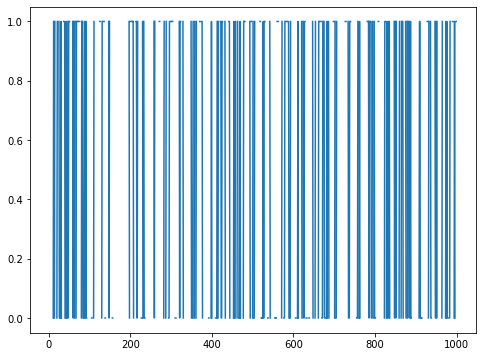

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
x = monty_hall(1000)[0][0]
monty_hall(1000)[0][1][:1]
y1 = [np.mean(monty_hall(1000)[0][1][:i]) for i in monty_hall(1000)[0][1]]
y2 = monty_hall(1000)[1][1]
plt.plot(x,y1)


## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 